In [1]:
import csv
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
test_path = "test.csv"
train_path = "train.csv"
val_path = "val.csv"

train_gt_path = "train_gt.csv"
val_gt_path = "val_gt.csv"

In [3]:
with open(train_path, 'r') as file:
        train_reader = csv.reader(file)
        train_data = [row for row in train_reader]
with open(train_gt_path, 'r') as file:
    train_gt_reader = csv.reader(file)
    train_gt_data = [row for row in train_gt_reader]

with open(val_path, 'r') as file:
    val_reader = csv.reader(file)
    val_data = [row for row in val_reader]
with open(val_gt_path, 'r') as file:
    val_gt_reader = csv.reader(file)
    val_gt_data = [row for row in val_gt_reader]

with open(test_path, 'r') as file:
    test_reader = csv.reader(file)
    test_data = [row for row in test_reader]

In [4]:
# Define helper functions for data conversion
def convert_binary(value):
    return 1 if value == 'Yes' else 0

def convert_numeric(value):
    try:
        return float(value)
    except ValueError:
        return None
    
def convert_multi_value(value):
    if value == 'No phone service' or value == 'No internet service':
        return 0
    elif value == 'Yes':
        return 1
    else:
        return 2

In [5]:

# Preprocess the data
for dataset in [train_data, val_data, test_data]:
    # Iterate through each row
    for row in dataset:
        # Convert binary features
        row[1] = convert_binary(row[1])  # SeniorCitizen
        row[2] = convert_binary(row[2])  # Partner
        row[3] = convert_binary(row[3])  # Dependents
        row[5] = convert_binary(row[5])  # PhoneService
        row[6] = convert_multi_value(row[6])  # MultipleLines
        row[14] = convert_binary(row[14])  # PaperlessBilling
        row[8] = convert_multi_value(row[8])  # OnlineSecurity
        row[9] = convert_multi_value(row[9])  # OnlineBackup
        row[10] = convert_multi_value(row[10])  # DeviceProtection
        row[11] = convert_multi_value(row[11])  # TechSupport
        row[12] = convert_multi_value(row[12])  # StreamingTV
        row[13] = convert_multi_value(row[13])  # StreamingMovies
        row[15] = convert_multi_value(row[15])  # Contract

        # Convert numeric features
        row[4] = convert_numeric(row[4])  # tenure
        row[17] = convert_numeric(row[17])  # MonthlyCharges
        row[18] = convert_numeric(row[18])  # TotalCharges

        # Convert PaymentMethod
        if row[16] == 'Electronic check':
            row[16] = 0
        elif row[16] == 'Bank transfer (automatic)':
            row[16] = 1
        elif row[16] == 'Credit card (automatic)':
            row[16] = 2
        elif row[16] == 'Mailed check':
            row[16] = 3
            
        # Convert InternetService
        if row[7] == 'Fiber optic':
            row[7] = 2;
        elif row[7] == 'DSL':
            row[7] = 1;
        elif row[7] == 'No':
            row[7] = 0;
            
        # Convert Gender
        if row[0] == 'Male':
            row[0] = 1
        elif row[0] == 'Female':
            row[0] = 0

# Preprocess the ground truth data
train_gt_data = [[convert_binary(value) for value in row] for row in train_gt_data]
val_gt_data = [[convert_binary(value) for value in row] for row in val_gt_data]

print("Data Preprocessing Complete!")

Data Preprocessing Complete!


In [6]:
train_data[:5]

[['gender',
  0,
  0,
  0,
  None,
  0,
  2,
  'InternetService',
  2,
  2,
  2,
  2,
  2,
  2,
  0,
  2,
  'PaymentMethod',
  None,
  None],
 [1, 0, 1, 1, 27.0, 1, 1, 2, 2, 1, 2, 1, 2, 2, 0, 1, 2, 85.2, 2151.6],
 [0, 0, 0, 0, 5.0, 1, 1, 2, 2, 1, 2, 2, 1, 2, 0, 1, 0, 90.8, 455.5],
 [0, 0, 1, 1, 47.0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 20.25, 873.4],
 [1, 0, 1, 0, 18.0, 1, 1, 2, 1, 2, 2, 2, 1, 1, 0, 1, 0, 99.4, 1742.95]]

In [7]:
train_gt_data[:5]

[[0], [0], [1], [0], [1]]

In [8]:
# Load the data
data = pd.DataFrame(train_data[1:], columns=train_data[0])

target = pd.DataFrame(train_gt_data[1:], columns=train_gt_data[0])

data[:3], target[:3]

(   gender  0  0  0  None  0  2  InternetService  2  2  2  2  2  2  0  2  \
 0       1  0  1  1  27.0  1  1                2  2  1  2  1  2  2  0  1   
 1       0  0  0  0   5.0  1  1                2  2  1  2  2  1  2  0  1   
 2       0  0  1  1  47.0  1  2                0  0  0  0  0  0  0  0  2   
 
    PaymentMethod   None    None  
 0              2  85.20  2151.6  
 1              0  90.80   455.5  
 2              2  20.25   873.4  ,
    0
 0  0
 1  1
 2  0)

In [9]:
# Visualize the target variable distribution
target_counts = {}
for row in train_gt_data:
    target_value = row[0]
    if target_value in target_counts:
        target_counts[target_value] += 1
    else:
        target_counts[target_value] = 1

print("\nTarget Variable Distribution:")
for target_value, count in target_counts.items():
    print(f"{target_value}: {count}")



Target Variable Distribution:
0: 1140
1: 1103


In [10]:
    
# Visualize the distribution of categorical features
import matplotlib.pyplot as plt

for i in range(len(train_data[0])):
    if i in [0, 1, 2, 3, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16]:
        feature_name = train_data[0][i]
        feature_counts = feature_counts[i]
        
        plt.figure(figsize=(8, 6))
        plt.bar(range(len(feature_counts)), list(feature_counts.values()), align='center')
        plt.xticks(range(len(feature_counts)), list(feature_counts.keys()), rotation=90)
        plt.title(f"Distribution of {feature_name}")
        plt.xlabel(feature_name)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

NameError: name 'feature_counts' is not defined

In [ ]:
       
# Visualize the distribution of numeric features
import seaborn as sns

numeric_features = [4, 17, 18]
for i in numeric_features:
    feature_name = train_data[0][i]
    feature_values = [float(row[i]) for row in train_data[1:]]
    
    plt.figure(figsize=(8, 6))
    sns.histplot(feature_values, kde=True)
    plt.title(f"Distribution of {feature_name}")
    plt.xlabel(feature_name)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

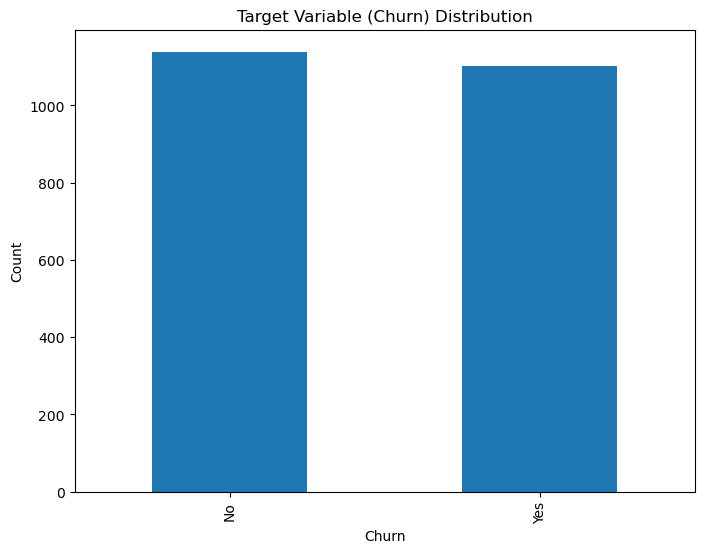

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

test_path = "test.csv"
train_path = "train.csv"
val_path = "val.csv"

train_gt_path = "train_gt.csv"
val_gt_path = "val_gt.csv"

# Load the data
train_data = pd.read_csv(train_path)
train_gt_data = pd.read_csv(train_gt_path)
val_data = pd.read_csv(val_path)
val_gt_data = pd.read_csv(val_gt_path)
test_data = pd.read_csv(test_path)

# Data Preprocessing
# Convert categorical features to numerical
label_encoder = LabelEncoder()
train_data['gender'] = label_encoder.fit_transform(train_data['gender'])
train_data['Partner'] = label_encoder.fit_transform(train_data['Partner'])
train_data['Dependents'] = label_encoder.fit_transform(train_data['Dependents'])
train_data['MultipleLines'] = label_encoder.fit_transform(train_data['MultipleLines'])
train_data['InternetService'] = label_encoder.fit_transform(train_data['InternetService'])
train_data['OnlineSecurity'] = label_encoder.fit_transform(train_data['OnlineSecurity'])
train_data['OnlineBackup'] = label_encoder.fit_transform(train_data['OnlineBackup'])
train_data['DeviceProtection'] = label_encoder.fit_transform(train_data['DeviceProtection'])
train_data['TechSupport'] = label_encoder.fit_transform(train_data['TechSupport'])
train_data['StreamingTV'] = label_encoder.fit_transform(train_data['StreamingTV'])
train_data['StreamingMovies'] = label_encoder.fit_transform(train_data['StreamingMovies'])
train_data['Contract'] = label_encoder.fit_transform(train_data['Contract'])
train_data['PaperlessBilling'] = label_encoder.fit_transform(train_data['PaperlessBilling'])
train_data['PaymentMethod'] = label_encoder.fit_transform(train_data['PaymentMethod'])

# Perform similar transformations on val_data and test_data

# Visualize the data
# Target variable distribution
plt.figure(figsize=(8, 6))
train_gt_data['Churn'].value_counts().plot(kind='bar')
plt.title('Target Variable (Churn) Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


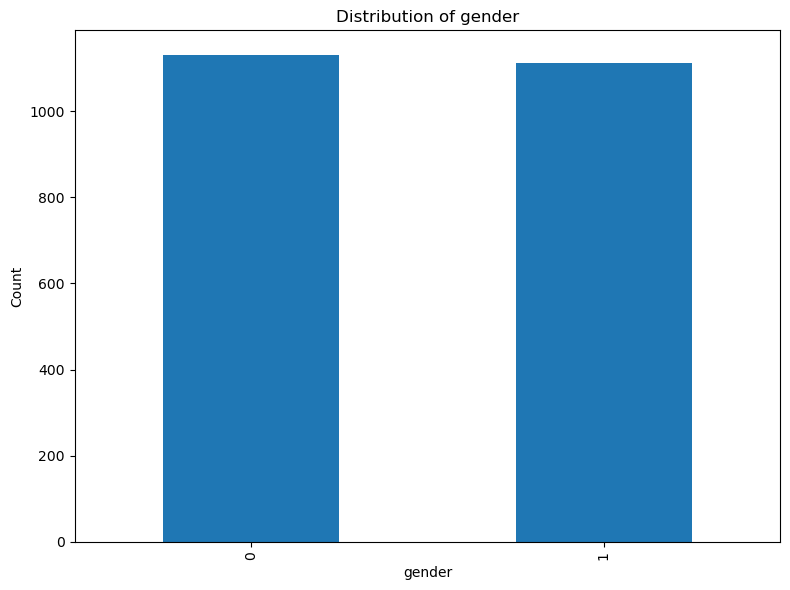

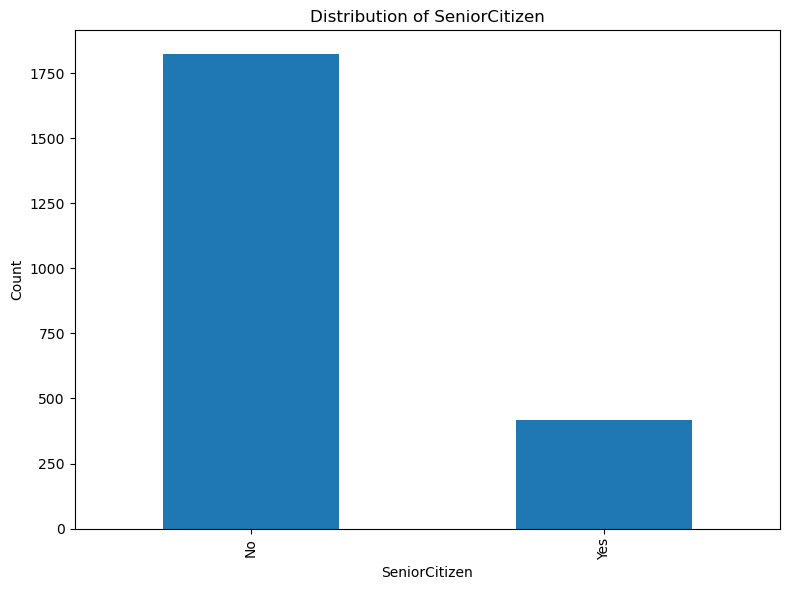

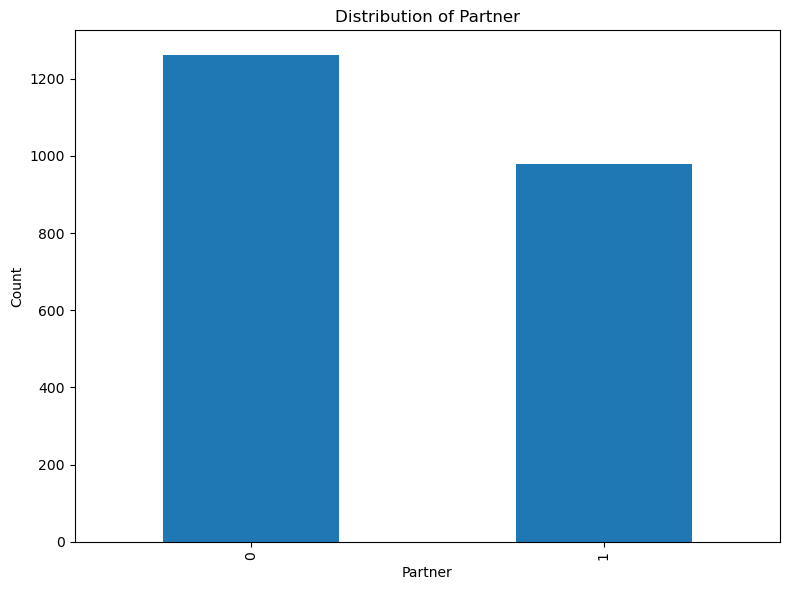

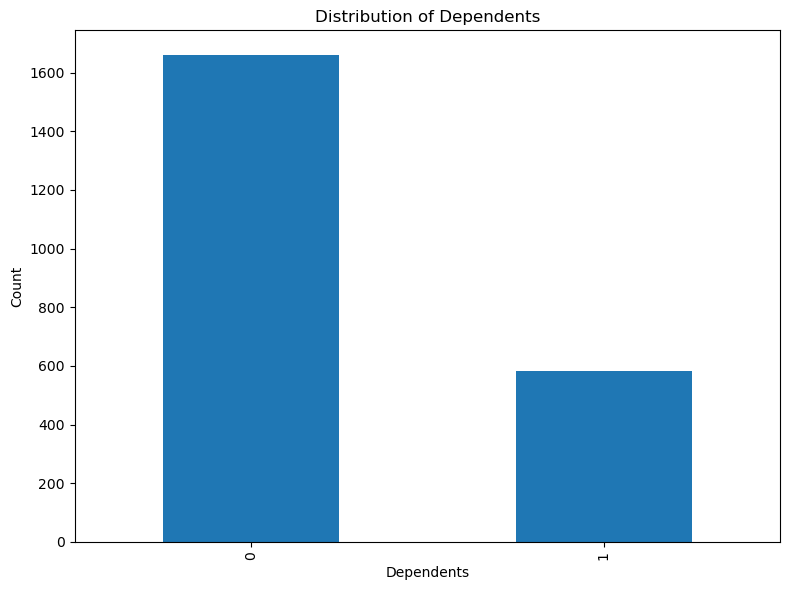

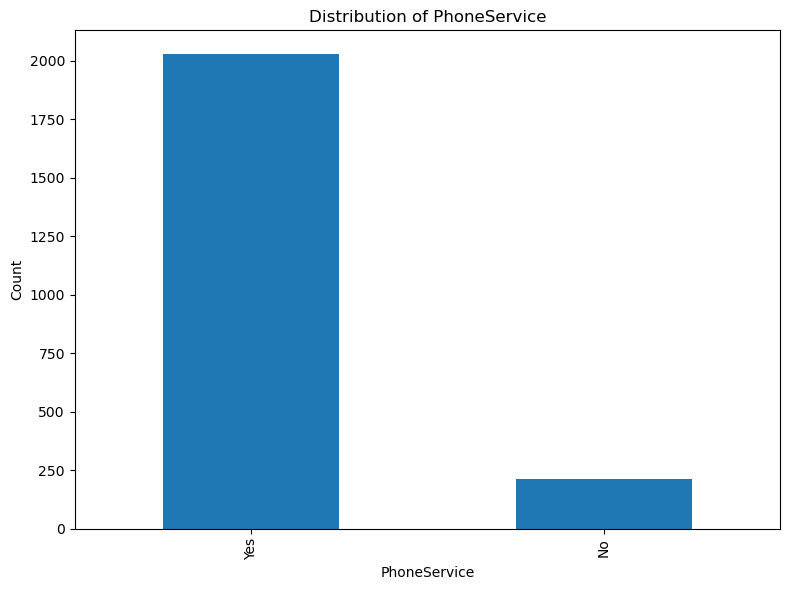

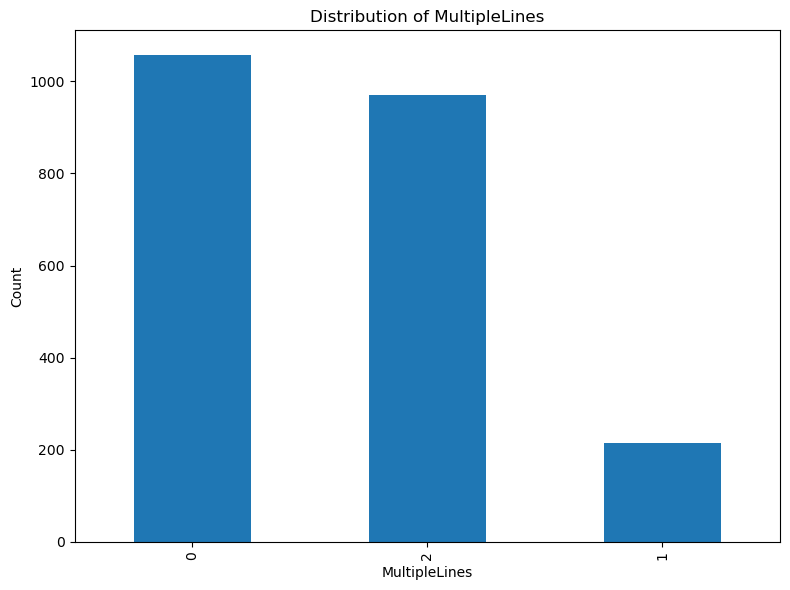

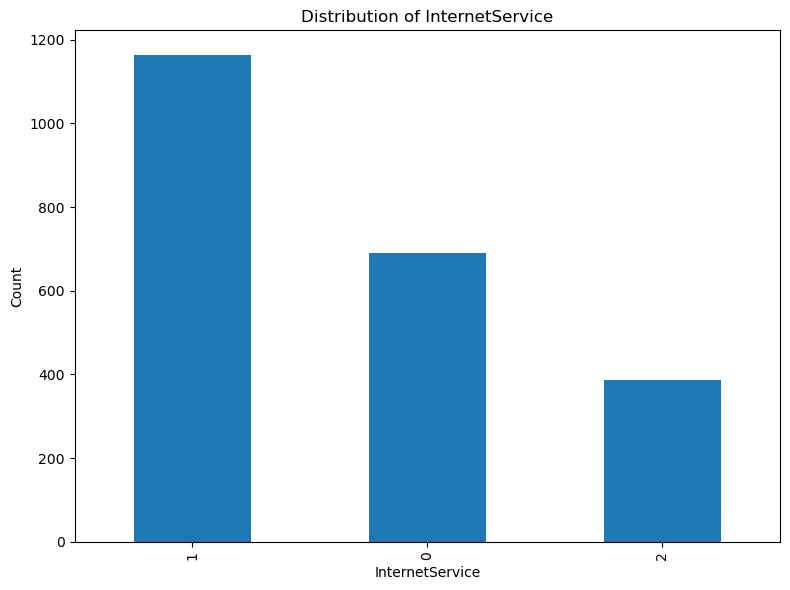

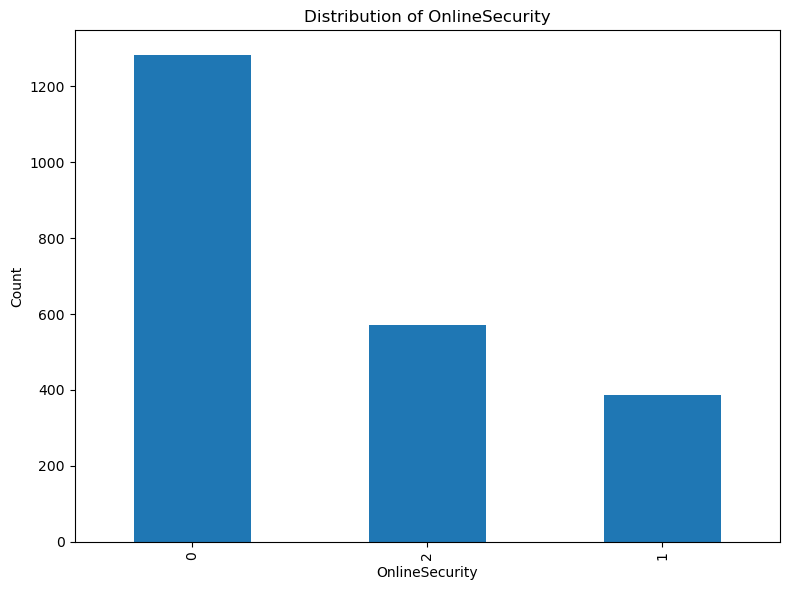

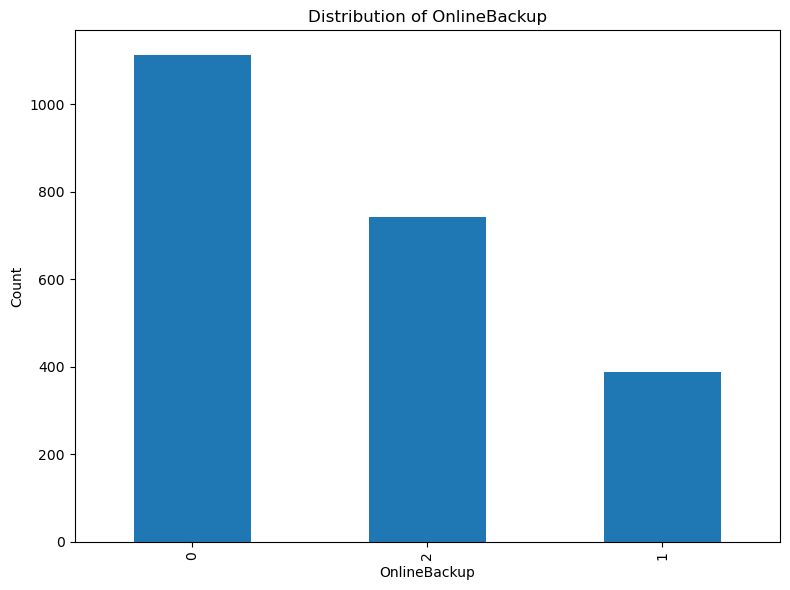

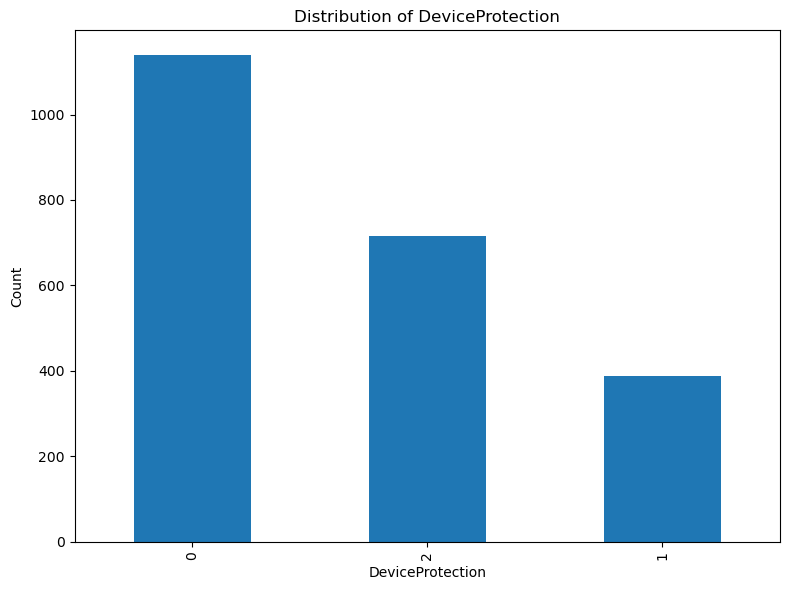

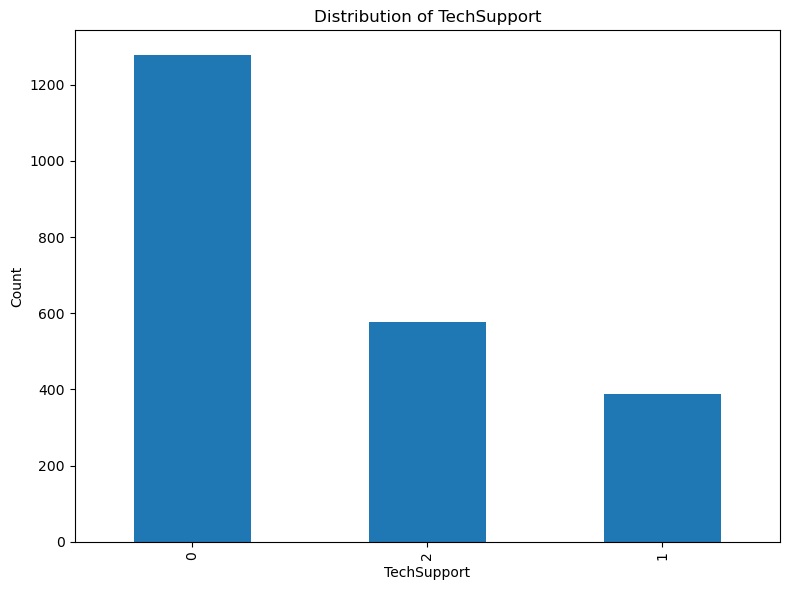

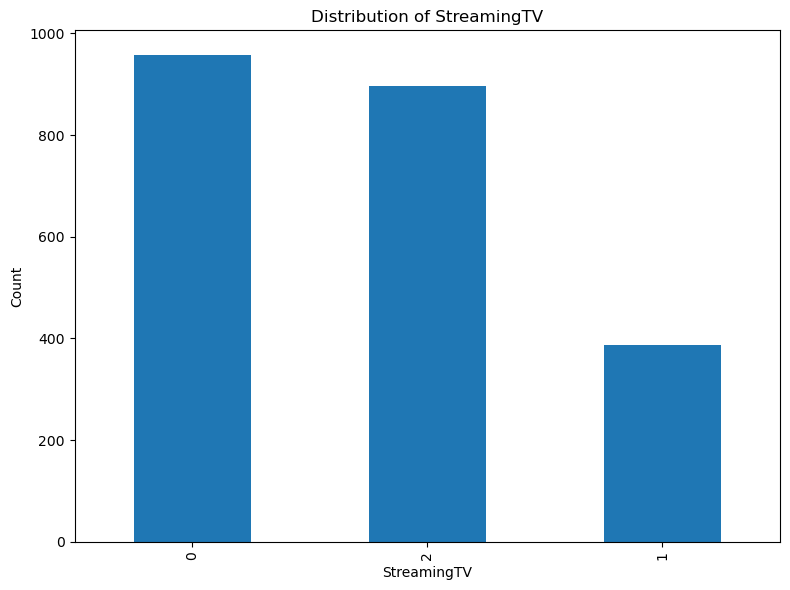

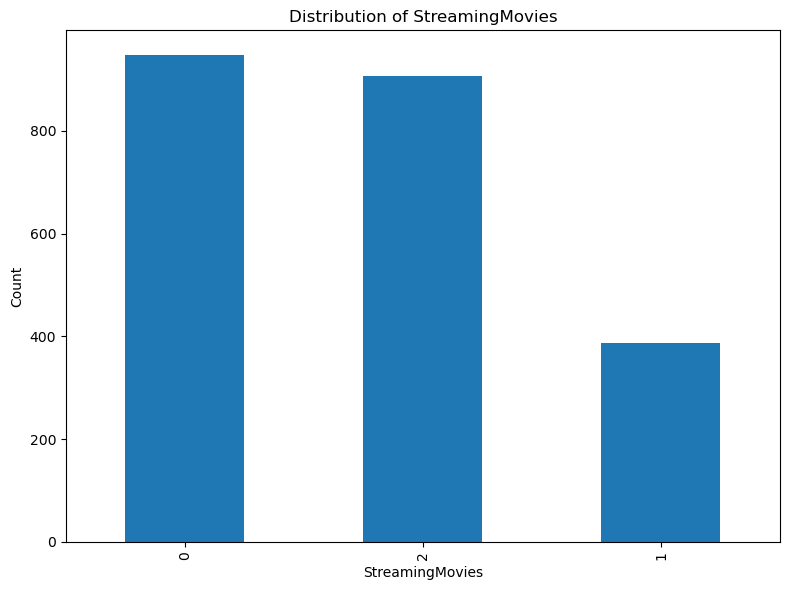

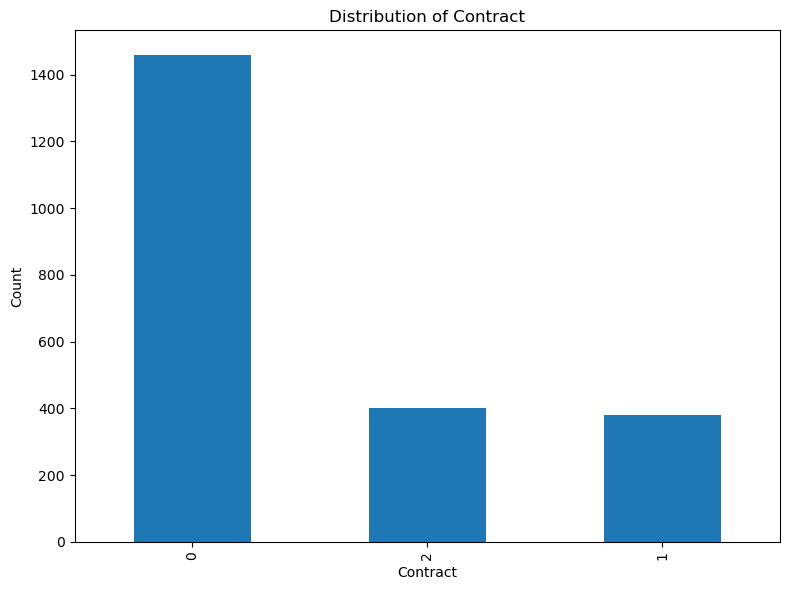

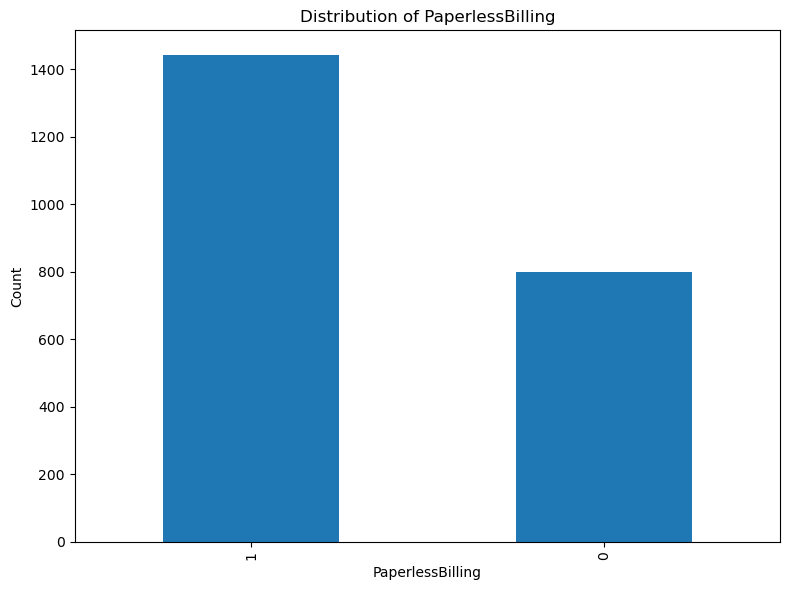

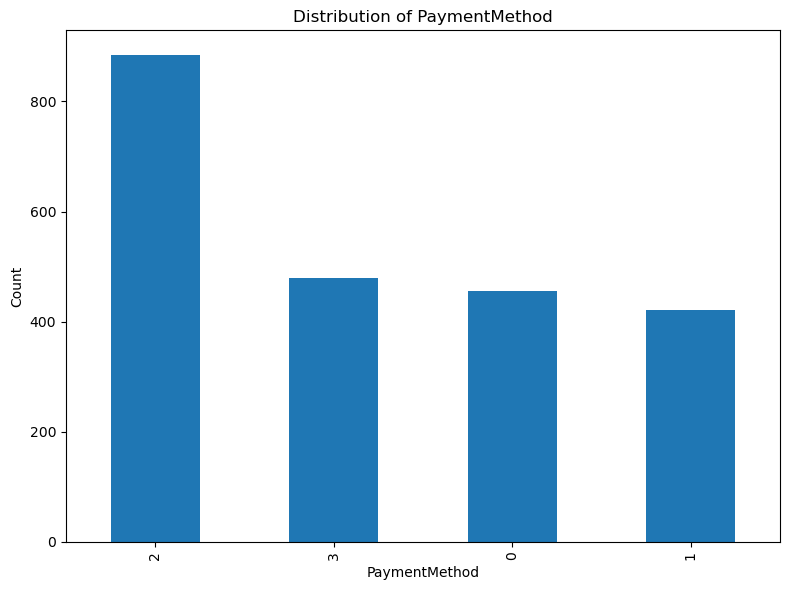

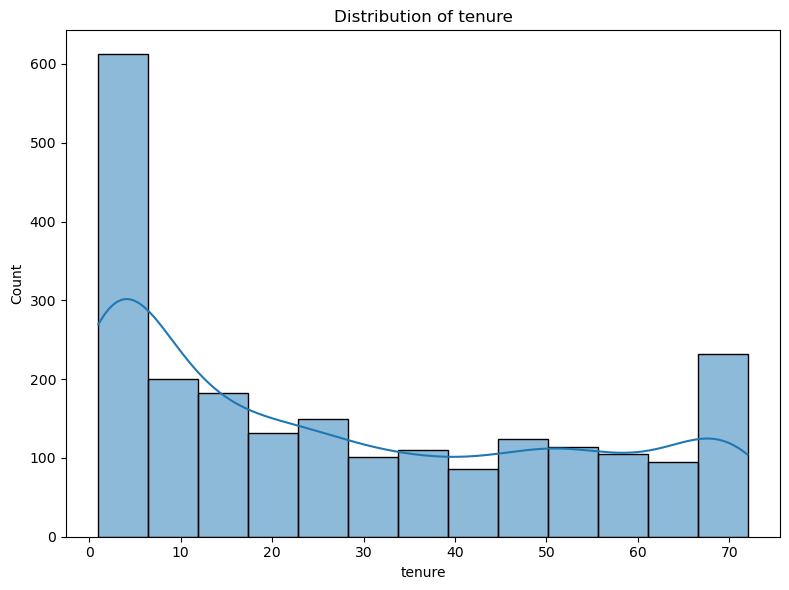

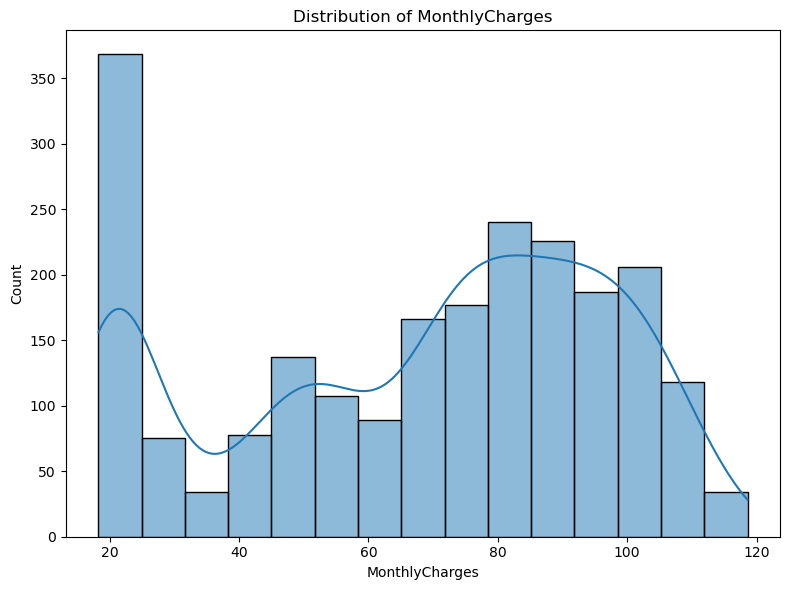

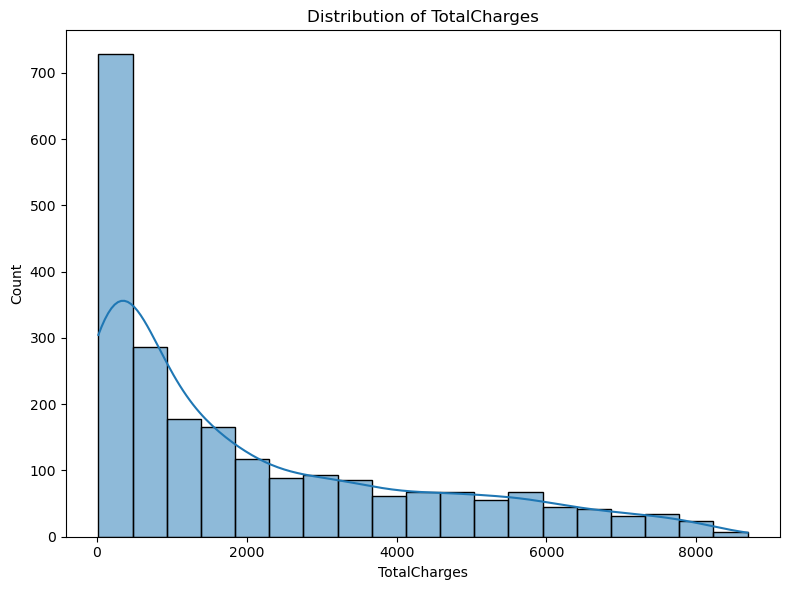

In [16]:

# Categorical feature distributions
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'Contract', 'PaperlessBilling', 'PaymentMethod']

for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    train_data[feature].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Numerical feature distributions
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(train_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the data
train_data = pd.read_csv(train_path)
train_gt_data = pd.read_csv(train_gt_path)

# Combine the training data and ground truth
data = pd.concat([train_data, train_gt_data], axis=1)

# Convert categorical features to numerical
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['SeniorCitizen'] = label_encoder.fit_transform(data['SeniorCitizen'])
data['Partner'] = label_encoder.fit_transform(data['Partner'])
data['Dependents'] = label_encoder.fit_transform(data['Dependents'])
data['PhoneService'] = label_encoder.fit_transform(data['PhoneService'])
data['MultipleLines'] = label_encoder.fit_transform(data['MultipleLines'])
data['InternetService'] = label_encoder.fit_transform(data['InternetService'])
data['OnlineSecurity'] = label_encoder.fit_transform(data['OnlineSecurity'])
data['OnlineBackup'] = label_encoder.fit_transform(data['OnlineBackup'])
data['DeviceProtection'] = label_encoder.fit_transform(data['DeviceProtection'])
data['TechSupport'] = label_encoder.fit_transform(data['TechSupport'])
data['StreamingTV'] = label_encoder.fit_transform(data['StreamingTV'])
data['StreamingMovies'] = label_encoder.fit_transform(data['StreamingMovies'])
data['Contract'] = label_encoder.fit_transform(data['Contract'])
data['PaperlessBilling'] = label_encoder.fit_transform(data['PaperlessBilling'])
data['PaymentMethod'] = label_encoder.fit_transform(data['PaymentMethod'])
data['Churn'] = label_encoder.fit_transform(data['Churn'])

data[:5]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,27,1,2,1,0,2,0,2,0,0,0,1,1,85.20,2151.60,0
1,0,0,0,0,5,1,2,1,0,2,0,0,2,0,0,1,2,90.80,455.50,1
2,0,0,1,1,47,1,0,2,1,1,1,1,1,1,2,0,1,20.25,873.40,0
3,1,0,1,0,18,1,2,1,2,0,0,0,2,2,0,1,2,99.40,1742.95,1
4,1,0,1,1,13,1,0,0,0,0,0,0,0,0,0,0,0,44.80,559.20,0


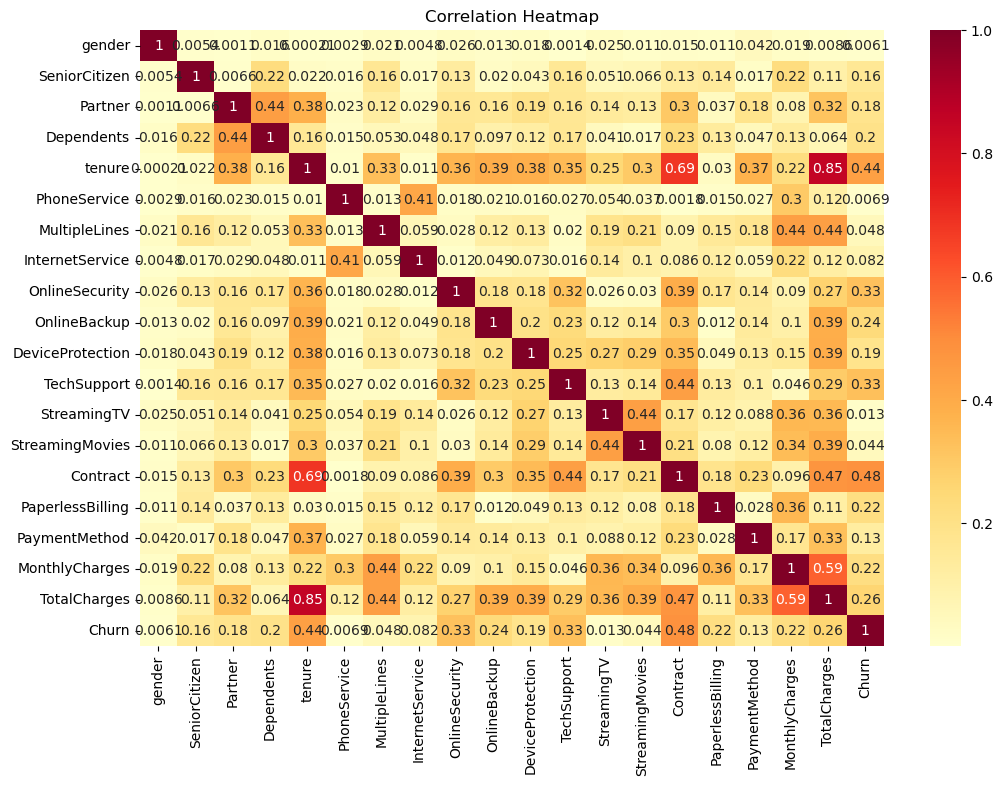

In [18]:
# Visualize the relationships
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr().abs(), annot=True, cmap='YlOrRd')
plt.title('Correlation Heatmap')
plt.show()

In [19]:

# Pairplot with target variable
# plt.figure(figsize=(16, 12))
# sns.pairplot(data, hue='Churn')
# plt.title('Pairplot with Target Variable')
# plt.show()


In [20]:

# # Individual feature vs target plots
# for feature in train_data.columns:
#     if feature != 'Churn':
#         plt.figure(figsize=(8, 6))
#         sns.countplot(x=feature, hue='Churn', data=data)
#         plt.title(f'{feature} vs Churn')
#         plt.xlabel(feature)
#         plt.ylabel('Count')
#         plt.tight_layout()
#         plt.show()

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data.drop('Churn', axis=1))
y = data['Churn']

# Perform PCA
pca = PCA(n_components=len(data.columns) - 1)
principal_components = pca.fit_transform(X)


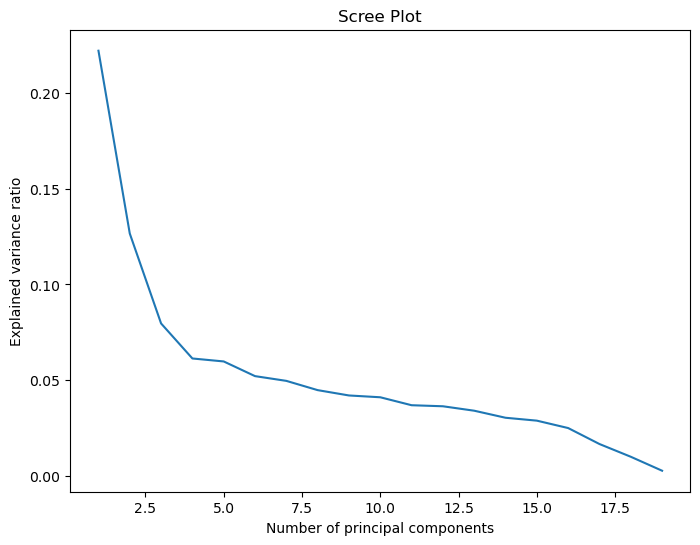

In [22]:

# Explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Number of principal components')
plt.ylabel('Explained variance ratio')
plt.title('Scree Plot')
plt.show()


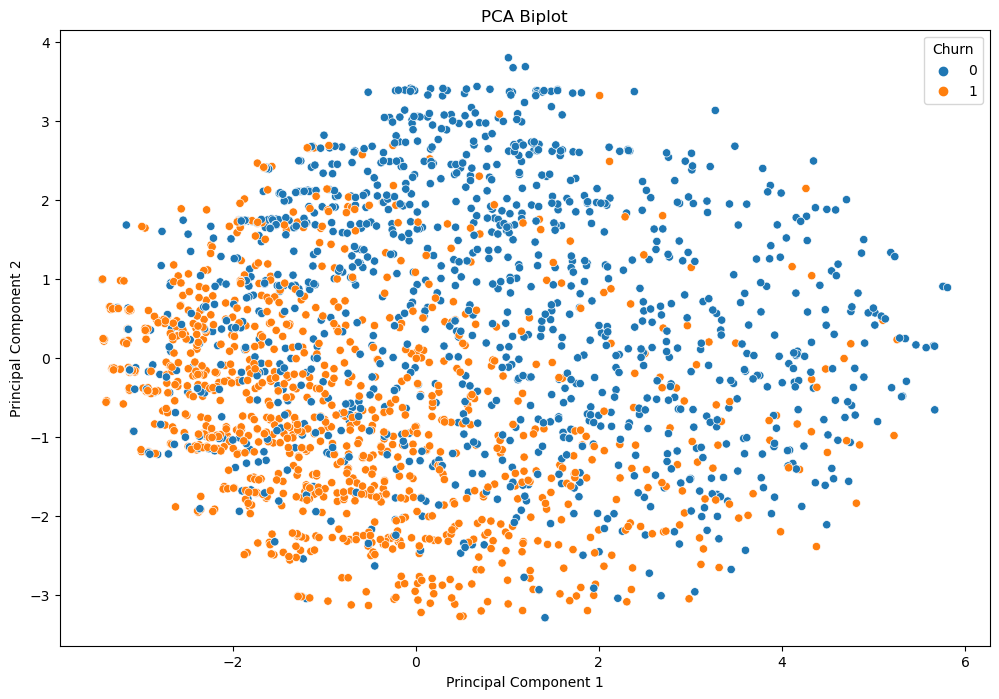

In [23]:

# PCA Biplot
plt.figure(figsize=(12, 8))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Biplot')
plt.show()


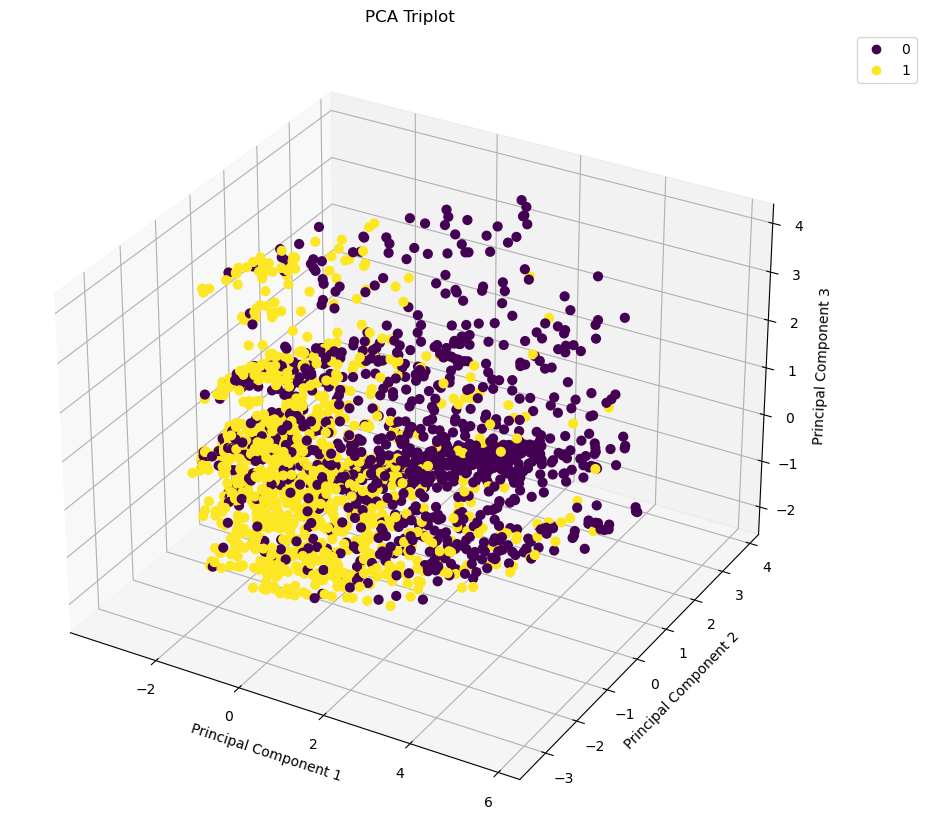

In [24]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# PCA Biplot
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

sc = ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2], s=40, c=y, marker='o', alpha=1)

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA Triplot')
plt.show()


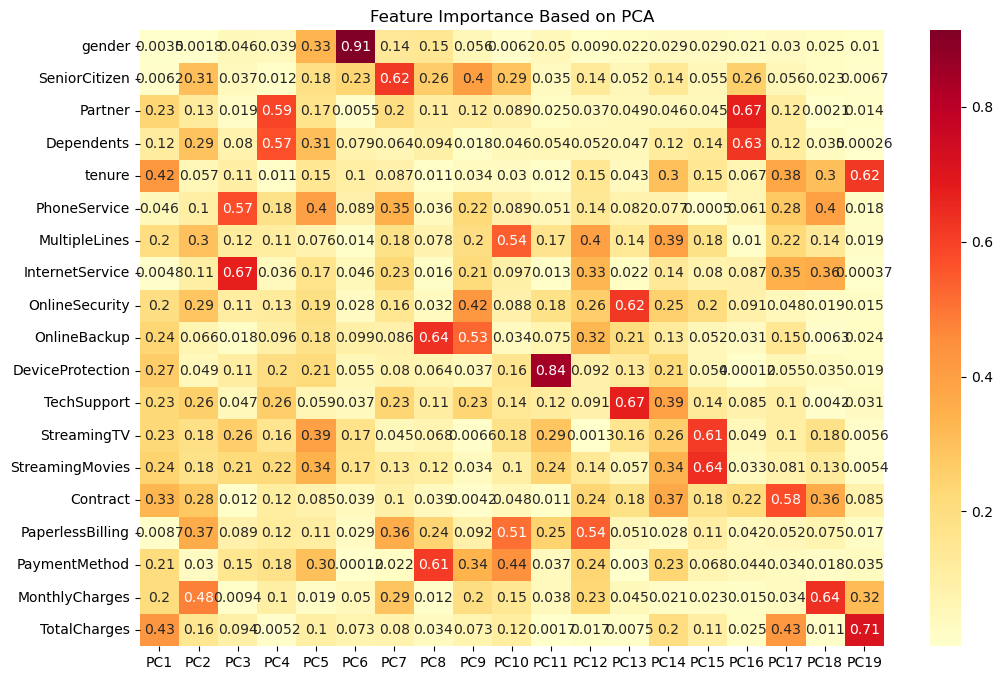

In [25]:

# Feature importance based on PCA
pca_df = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(data.columns) - 1)], index=data.drop('Churn', axis=1).columns)
plt.figure(figsize=(12, 8))
sns.heatmap(pca_df.abs(), annot=True, cmap='YlOrRd')
plt.title('Feature Importance Based on PCA')
plt.show()

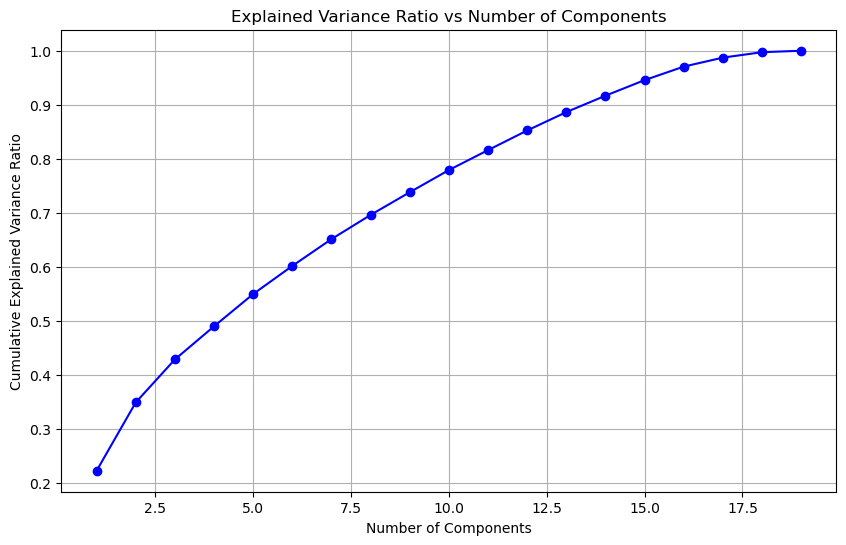


Number of components explaining 95% of variance: 16

KNN Results:
Best parameters: {'n_neighbors': 11}
Accuracy: 0.7350

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.68      0.71       218
           1       0.72      0.78      0.75       231

    accuracy                           0.73       449
   macro avg       0.74      0.73      0.73       449
weighted avg       0.74      0.73      0.73       449


SVM Results:
Best parameters: {'C': 0.1, 'kernel': 'rbf'}
Accuracy: 0.7216

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.71      0.71       218
           1       0.73      0.74      0.73       231

    accuracy                           0.72       449
   macro avg       0.72      0.72      0.72       449
weighted avg       0.72      0.72      0.72       449



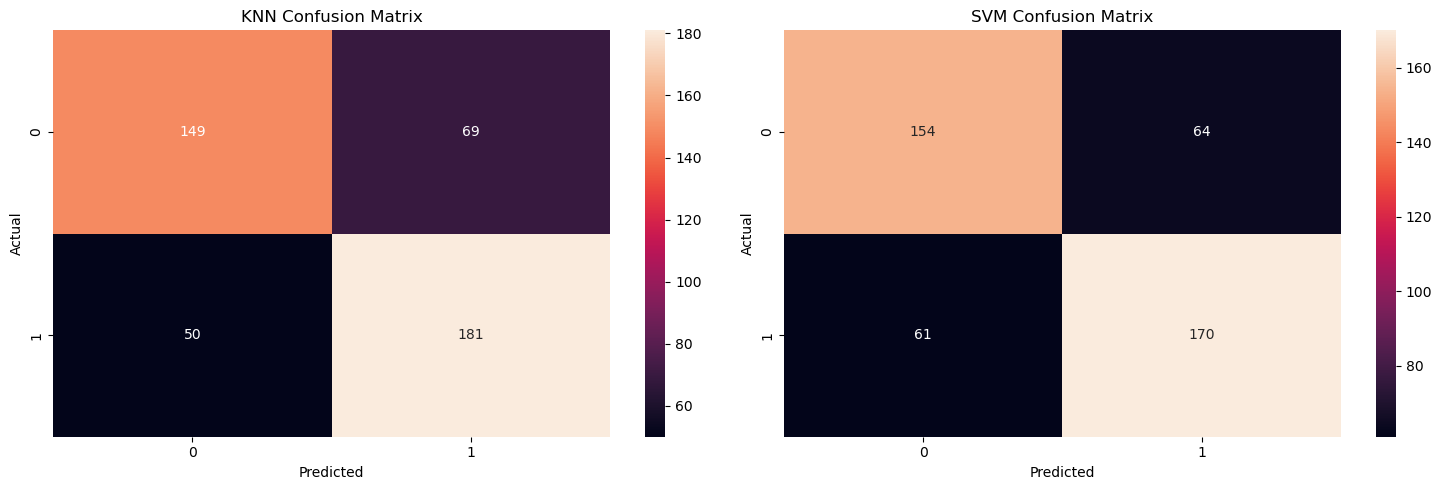

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data
X_train, X_test, y_train, y_test = train_test_split(principal_components, y, 
                                                    test_size=0.2, random_state=42)

def plot_explained_variance(pca):
    """Plot the explained variance ratio for PCA components."""
    plt.figure(figsize=(10, 6))
    cumsum = np.cumsum(pca.explained_variance_ratio_)
    plt.plot(range(1, len(cumsum) + 1), cumsum, 'bo-')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('Explained Variance Ratio vs Number of Components')
    plt.grid(True)
    plt.show()

def train_and_evaluate_models(X_train, X_test, y_train, y_test, n_components):
    """Train and evaluate KNN and SVM models with reduced dimensions."""
    # Reduce dimensions to specified number of components
    pca_final = PCA(n_components=n_components)
    X_train_reduced = pca_final.fit_transform(X_train)
    X_test_reduced = pca_final.transform(X_test)
    
    # Train KNN
    knn_params = {'n_neighbors': [3, 5, 7, 9, 11]}
    knn = KNeighborsClassifier()
    knn_grid = GridSearchCV(knn, knn_params, cv=5)
    knn_grid.fit(X_train_reduced, y_train)
    knn_pred = knn_grid.predict(X_test_reduced)
    
    # Train SVM
    svm_params = {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']}
    svm = SVC()
    svm_grid = GridSearchCV(svm, svm_params, cv=5)
    svm_grid.fit(X_train_reduced, y_train)
    svm_pred = svm_grid.predict(X_test_reduced)
    
    # Print results
    print("\nKNN Results:")
    print(f"Best parameters: {knn_grid.best_params_}")
    print(f"Accuracy: {accuracy_score(y_test, knn_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, knn_pred))
    
    print("\nSVM Results:")
    print(f"Best parameters: {svm_grid.best_params_}")
    print(f"Accuracy: {accuracy_score(y_test, svm_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, svm_pred))
    
    # Plot confusion matrices
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # KNN confusion matrix
    cm_knn = confusion_matrix(y_test, knn_pred)
    sns.heatmap(cm_knn, annot=True, fmt='d', ax=ax1)
    ax1.set_title('KNN Confusion Matrix')
    ax1.set_xlabel('Predicted')
    ax1.set_ylabel('Actual')
    
    # SVM confusion matrix
    cm_svm = confusion_matrix(y_test, svm_pred)
    sns.heatmap(cm_svm, annot=True, fmt='d', ax=ax2)
    ax2.set_title('SVM Confusion Matrix')
    ax2.set_xlabel('Predicted')
    ax2.set_ylabel('Actual')
    
    plt.tight_layout()
    plt.show()
    
    return knn_grid, svm_grid

# Plot explained variance ratio
plot_explained_variance(pca)

# Find optimal number of components (explain 95% of variance)
cumsum = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumsum >= 0.95) + 1
print(f"\nNumber of components explaining 95% of variance: {n_components}")

# Train and evaluate models with reduced dimensions
knn_model, svm_model = train_and_evaluate_models(X_train, X_test, y_train, y_test, n_components)


Training models with original data...

Original Data Results:
KNN:
Best parameters: {'n_neighbors': 9}
Accuracy: 0.7038
Training time: 1.97 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.74      0.71       218
           1       0.73      0.67      0.70       231

    accuracy                           0.70       449
   macro avg       0.71      0.70      0.70       449
weighted avg       0.71      0.70      0.70       449


SVM:
Best parameters: {'C': 0.1, 'kernel': 'linear'}
Accuracy: 0.7216
Training time: 1530.97 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.75      0.72       218
           1       0.75      0.70      0.72       231

    accuracy                           0.72       449
   macro avg       0.72      0.72      0.72       449
weighted avg       0.72      0.72      0.72       449



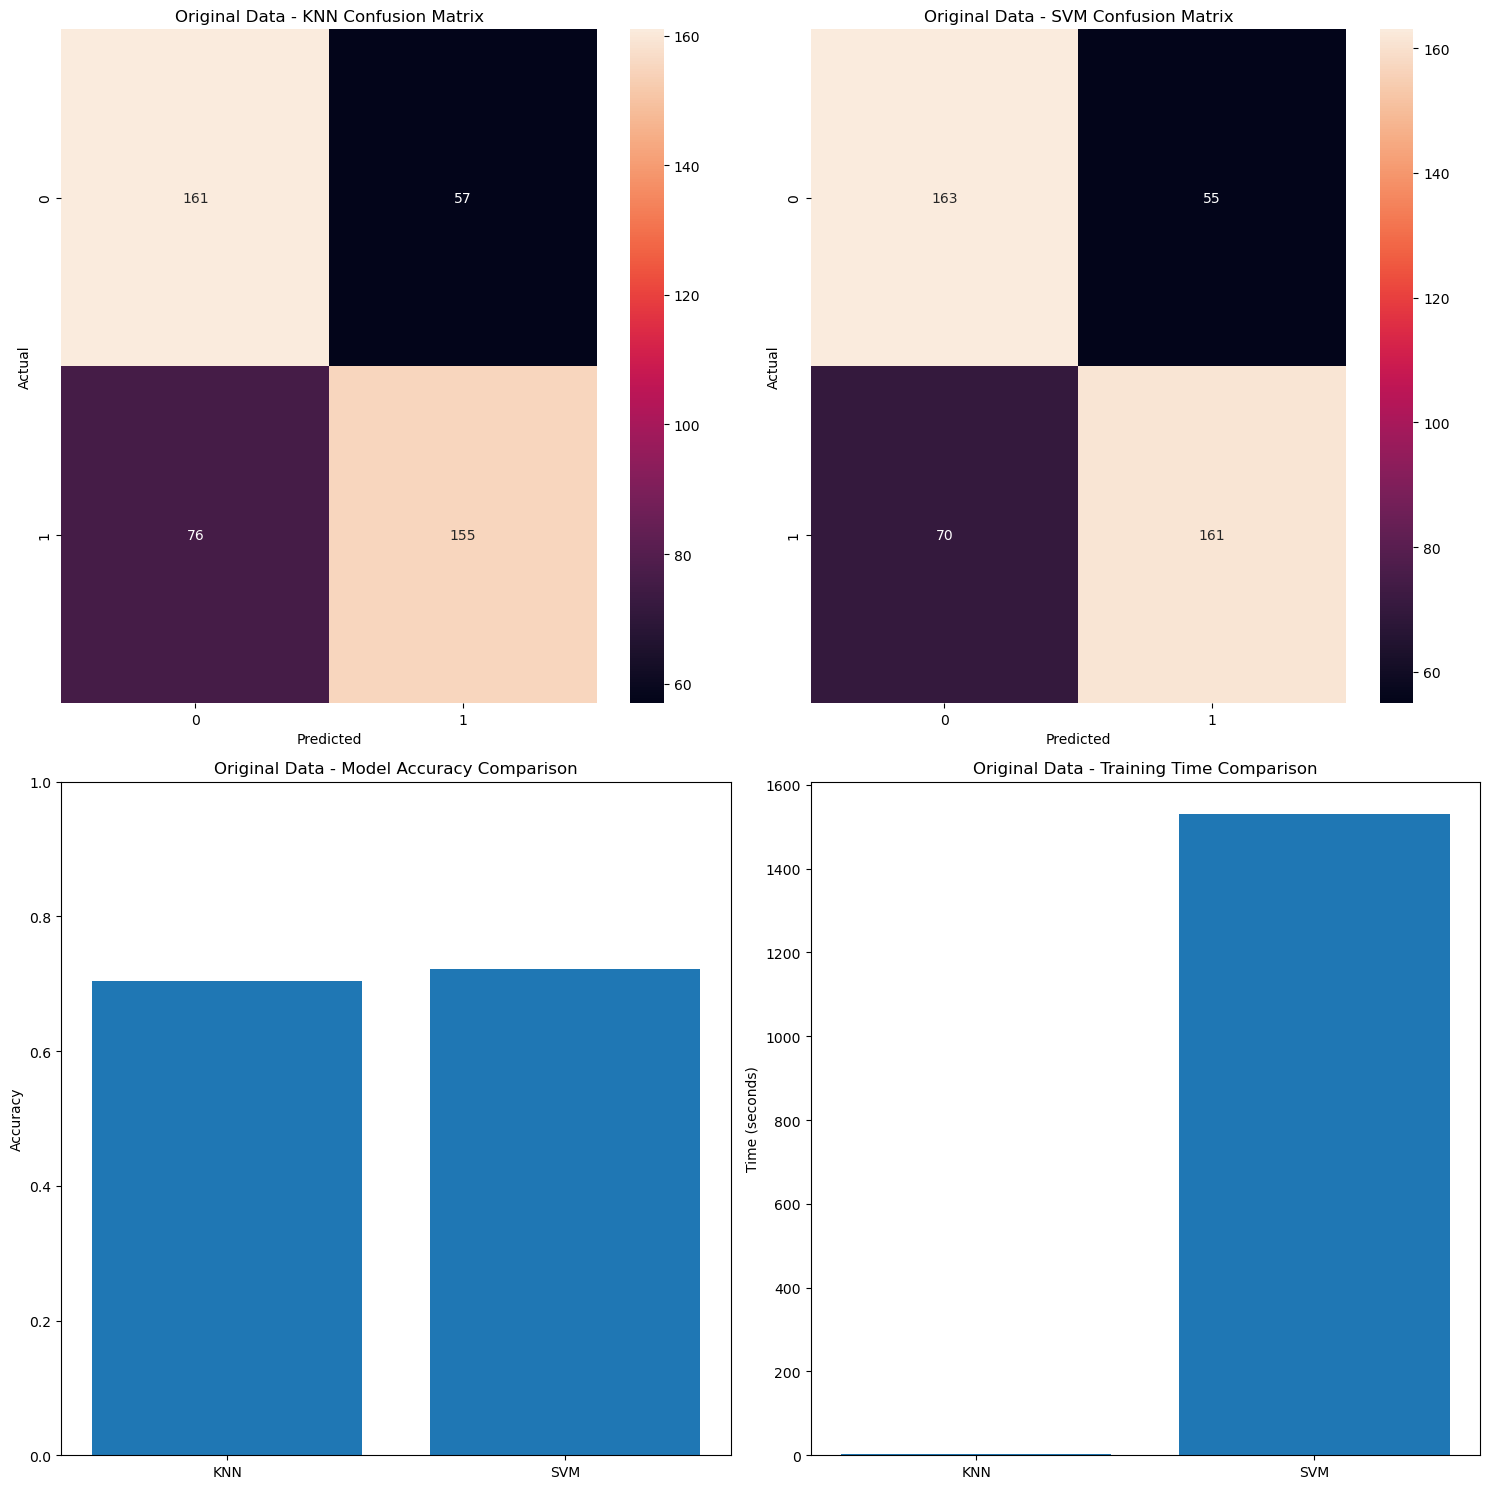


Training models with PCA-transformed data...

Number of components selected by PCA: 1
Explained variance ratio: 0.9998


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time

def train_and_evaluate(X_train, X_test, y_train, y_test, model_name="Model"):
    """Train and evaluate models on given data."""
    results = {}
    
    # Train KNN
    start_time = time.time()
    knn_params = {'n_neighbors': [3, 5, 7, 9, 11]}
    knn = KNeighborsClassifier()
    knn_grid = GridSearchCV(knn, knn_params, cv=5)
    knn_grid.fit(X_train, y_train)
    knn_pred = knn_grid.predict(X_test)
    knn_time = time.time() - start_time
    
    # Train SVM
    start_time = time.time()
    svm_params = {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']}
    svm = SVC()
    svm_grid = GridSearchCV(svm, svm_params, cv=5)
    svm_grid.fit(X_train, y_train)
    svm_pred = svm_grid.predict(X_test)
    svm_time = time.time() - start_time
    
    # Store results
    results = {
        'knn_accuracy': accuracy_score(y_test, knn_pred),
        'knn_best_params': knn_grid.best_params_,
        'knn_time': knn_time,
        'knn_predictions': knn_pred,
        'svm_accuracy': accuracy_score(y_test, svm_pred),
        'svm_best_params': svm_grid.best_params_,
        'svm_time': svm_time,
        'svm_predictions': svm_pred
    }
    
    # Print results
    print(f"\n{model_name} Results:")
    print("KNN:")
    print(f"Best parameters: {results['knn_best_params']}")
    print(f"Accuracy: {results['knn_accuracy']:.4f}")
    print(f"Training time: {results['knn_time']:.2f} seconds")
    print("\nClassification Report:")
    print(classification_report(y_test, results['knn_predictions']))
    
    print("\nSVM:")
    print(f"Best parameters: {results['svm_best_params']}")
    print(f"Accuracy: {results['svm_accuracy']:.4f}")
    print(f"Training time: {results['svm_time']:.2f} seconds")
    print("\nClassification Report:")
    print(classification_report(y_test, results['svm_predictions']))
    
    return results

def plot_confusion_matrices(results, y_test, title_prefix=""):
    """Plot confusion matrices for both models."""
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))
    
    # KNN confusion matrix
    cm_knn = confusion_matrix(y_test, results['knn_predictions'])
    sns.heatmap(cm_knn, annot=True, fmt='d', ax=ax1)
    ax1.set_title(f'{title_prefix} KNN Confusion Matrix')
    ax1.set_xlabel('Predicted')
    ax1.set_ylabel('Actual')
    
    # SVM confusion matrix
    cm_svm = confusion_matrix(y_test, results['svm_predictions'])
    sns.heatmap(cm_svm, annot=True, fmt='d', ax=ax2)
    ax2.set_title(f'{title_prefix} SVM Confusion Matrix')
    ax2.set_xlabel('Predicted')
    ax2.set_ylabel('Actual')
    
    # Plot accuracy comparison
    models = ['KNN', 'SVM']
    accuracies = [results['knn_accuracy'], results['svm_accuracy']]
    ax3.bar(models, accuracies)
    ax3.set_ylim([0, 1])
    ax3.set_title(f'{title_prefix} Model Accuracy Comparison')
    ax3.set_ylabel('Accuracy')
    
    # Plot training time comparison
    times = [results['knn_time'], results['svm_time']]
    ax4.bar(models, times)
    ax4.set_title(f'{title_prefix} Training Time Comparison')
    ax4.set_ylabel('Time (seconds)')
    
    plt.tight_layout()
    plt.show()

# Split the original data
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate with original data
print("\nTraining models with original data...")
original_results = train_and_evaluate(X_train, X_test, y_train, y_test, "Original Data")
plot_confusion_matrices(original_results, y_test, "Original Data -")

# Train and evaluate with PCA data
print("\nTraining models with PCA-transformed data...")
# Find optimal number of components (explain 95% of variance)
pca = PCA(n_components=0.95)  # Automatically select components for 95% variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"\nNumber of components selected by PCA: {pca.n_components_}")
print(f"Explained variance ratio: {sum(pca.explained_variance_ratio_):.4f}")

pca_results = train_and_evaluate(X_train_pca, X_test_pca, y_train, y_test, "PCA-transformed Data")
plot_confusion_matrices(pca_results, y_test, "PCA-transformed Data -")

# Compare overall results
print("\nOverall Comparison:")
print("\nAccuracy Comparison:")
print(f"Original Data - KNN: {original_results['knn_accuracy']:.4f}, SVM: {original_results['svm_accuracy']:.4f}")
print(f"PCA Data     - KNN: {pca_results['knn_accuracy']:.4f}, SVM: {pca_results['svm_accuracy']:.4f}")

print("\nTraining Time Comparison:")
print(f"Original Data - KNN: {original_results['knn_time']:.2f}s, SVM: {original_results['svm_time']:.2f}s")
print(f"PCA Data     - KNN: {pca_results['knn_time']:.2f}s, SVM: {pca_results['svm_time']:.2f}s")

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

class KNNEnsemble(BaseEstimator, ClassifierMixin):
    """Custom KNN Ensemble that combines multiple KNN classifiers with different configurations"""
    
    def __init__(self, n_neighbors_list=[3,5,7,9,11], weights_list=['uniform', 'distance'],
                 p_list=[1,2], n_estimators=10):
        self.n_neighbors_list = n_neighbors_list
        self.weights_list = weights_list
        self.p_list = p_list  # Distance metric (1: manhattan, 2: euclidean)
        self.n_estimators = n_estimators
        self.classifiers = []
        
    def fit(self, X, y):
        """Fit multiple KNN classifiers with different parameters"""
        self.classifiers = []
        
        # Create diverse KNN classifiers
        for _ in range(self.n_estimators):
            # Randomly select parameters
            n_neighbors = np.random.choice(self.n_neighbors_list)
            weights = np.random.choice(self.weights_list)
            p = np.random.choice(self.p_list)
            
            # Create and train classifier
            knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, p=p)
            
            # Use bagging (random sampling with replacement)
            indices = np.random.randint(0, len(X), size=len(X))
            X_sample, y_sample = X[indices], y[indices]
            
            knn.fit(X_sample, y_sample)
            self.classifiers.append({
                'classifier': knn,
                'params': {'n_neighbors': n_neighbors, 'weights': weights, 'p': p}
            })
        
        return self
    
    def predict(self, X):
        """Predict using majority voting"""
        predictions = np.zeros((len(X), len(self.classifiers)))
        
        # Get predictions from all classifiers
        for i, clf in enumerate(self.classifiers):
            predictions[:, i] = clf['classifier'].predict(X)
        
        # Return majority vote
        return np.array([Counter(row).most_common(1)[0][0] for row in predictions])
    
    def predict_proba(self, X):
        """Predict class probabilities"""
        probas = np.zeros((len(X), 2))  # Assuming binary classification
        
        # Get predictions from all classifiers
        for clf in self.classifiers:
            probas += clf['classifier'].predict_proba(X)
        
        return probas / len(self.classifiers)

def evaluate_ensemble(X, y, test_size=0.2, random_state=42):
    """Evaluate the KNN ensemble and compare with single KNN and bagging"""
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=test_size, 
                                                        random_state=random_state)
    
    # Convert to numpy arrays if they're not already
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    
    # 1. Train single KNN
    single_knn = KNeighborsClassifier(n_neighbors=5)
    single_knn.fit(X_train, y_train)
    single_pred = single_knn.predict(X_test)
    
    # 2. Train scikit-learn's bagging KNN
    bagging_knn = BaggingClassifier(
        KNeighborsClassifier(n_neighbors=5),
        n_estimators=10,
        random_state=random_state
    )
    bagging_knn.fit(X_train, y_train)
    bagging_pred = bagging_knn.predict(X_test)
    
    # 3. Train our custom ensemble
    ensemble = KNNEnsemble(n_estimators=10)
    ensemble.fit(X_train, y_train)
    ensemble_pred = ensemble.predict(X_test)
    
    # Calculate accuracies
    results = {
        'Single KNN': {
            'accuracy': accuracy_score(y_test, single_pred),
            'predictions': single_pred
        },
        'Bagging KNN': {
            'accuracy': accuracy_score(y_test, bagging_pred),
            'predictions': bagging_pred
        },
        'Custom Ensemble': {
            'accuracy': accuracy_score(y_test, ensemble_pred),
            'predictions': ensemble_pred
        }
    }
    
    # Print results
    print("\nModel Comparison Results:")
    for model_name, result in results.items():
        print(f"\n{model_name}:")
        print(f"Accuracy: {result['accuracy']:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, result['predictions']))
    
    # Visualize results
    plt.figure(figsize=(15, 5))
    
    # 1. Accuracy comparison
    plt.subplot(121)
    accuracies = [result['accuracy'] for result in results.values()]
    plt.bar(results.keys(), accuracies)
    plt.title('Model Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)
    
    # 2. Confusion matrices
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for i, (model_name, result) in enumerate(results.items()):
        cm = confusion_matrix(y_test, result['predictions'])
        sns.heatmap(cm, annot=True, fmt='d', ax=axes[i])
        axes[i].set_title(f'{model_name}\nConfusion Matrix')
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')
    
    plt.tight_layout()
    plt.show()
    
    return ensemble, results

# Run the evaluation
print("Evaluating KNN Ensemble approaches...")
# For original data
print("\nResults with original data:")
ensemble_original, results_original = evaluate_ensemble(X, y)

# For PCA-transformed data
print("\nResults with PCA-transformed data:")
ensemble_pca, results_pca = evaluate_ensemble(principal_components, y)

# Compare overall results
print("\nOverall Comparison:")
print("\nOriginal Data Accuracies:")
for model, result in results_original.items():
    print(f"{model}: {result['accuracy']:.4f}")

print("\nPCA Data Accuracies:")
for model, result in results_pca.items():
    print(f"{model}: {result['accuracy']:.4f}")